<a href="https://colab.research.google.com/github/blaewood/Python_AI_Programming/blob/main/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A86_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 61s - loss: 0.2047 - accuracy: 0.9378 - val_loss: 0.0534 - val_accuracy: 0.9806 - 61s/epoch - 130ms/step
Epoch 2/30
469/469 - 55s - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0419 - val_accuracy: 0.9873 - 55s/epoch - 117ms/step
Epoch 3/30
469/469 - 55s - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0257 - val_accuracy: 0.9914 - 55s/epoch - 117ms/step
Epoch 4/30
469/469 - 55s - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0317 - val_accuracy: 0.9892 - 55s/epoch - 117ms/step
Epoch 5/30
469/469 - 55s - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0318 - val_accuracy: 0.9890 - 55s/epoch - 117ms/step
Epoch 6/30
469/469 - 55s - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0275 - val_accuracy: 0.9902 - 55s/epoch - 118ms/step
Epoch 7/30
469/469 - 55s - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0281 - val_accuracy: 0.9914 - 55s/epoch - 117ms/step
Epoch 8/30
469/469 - 55s - loss: 0.0127 - accuracy: 0

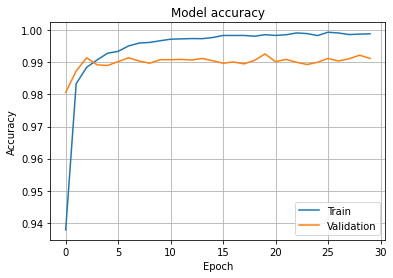

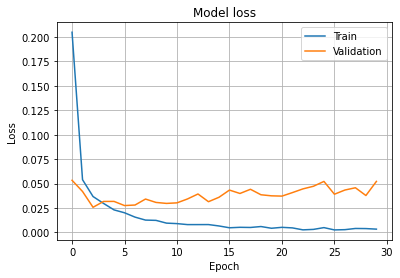

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()